In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
rf_results = []
gpr_results = []

for out in all_out:
    try:
        res = {
            "train_size": out["num_train_points"],
            "frac_valid": out["frac_valid"],
            "accuracy": out["accuracy"],
            "f1_macro": out["f1_macro"],
            "f1_micro": out["f1_micro"],
            "kappa": out["kappa"],
            "num_classes": out["num_classes"],
            "representation": out["representation"],
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["xgb"]["accuracy"],
        "f1_macro": out["xgb"]["f1_macro"],
        "f1_micro": out["xgb"]["f1_micro"],
        "kappa": out["xgb"]["kappa"],
        "num_classes": out["num_classes"],
    }

    tabpfn_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["tabpfn"]["accuracy"],
        "f1_macro": out["tabpfn"]["f1_macro"],
        "f1_micro": out["tabpfn"]["f1_micro"],
        "kappa": out["tabpfn"]["kappa"],
        "num_classes": out["num_classes"],
    }

    rf_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["rf"]["accuracy"],
        "f1_macro": out["rf"]["f1_macro"],
        "f1_micro": out["rf"]["f1_micro"],
        "kappa": out["rf"]["kappa"],
        "num_classes": out["num_classes"],
    }

    gpr_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["gpr"]["accuracy"],
        "f1_macro": out["gpr"]["f1_macro"],
        "f1_micro": out["gpr"]["f1_micro"],
        "kappa": out["gpr"]["kappa"],
        "num_classes": out["num_classes"],
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)
    rf_results.append(rf_res)
    gpr_results.append(gpr_res)

In [6]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)
rf_res = pd.DataFrame(rf_results)
gpr_res = pd.DataFrame(gpr_results)

In [7]:
grouped_res = res.groupby(["num_classes", "representation", "train_size"]).agg(["mean", "std", sem])

In [8]:
grouped_xgboost_res = xgboost_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [9]:
grouped_tabpfn_res = tabpfn_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [10]:
grouped_rf_res = rf_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [11]:
grouped_gpr_res = gpr_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [12]:
grouped_res

frac_valid            accuracy  \
                                            mean  std  sem      mean   
num_classes representation train_size                                  
2           InChI          10                1.0  0.0  0.0  0.506000   
                           50                1.0  0.0  0.0  0.523000   
                           100               1.0  0.0  0.0  0.545333   
                           200               1.0  0.0  0.0  0.582667   
                           500               1.0  0.0  0.0  0.632000   
            SELFIES        10                1.0  0.0  0.0  0.532000   
                           50                1.0  0.0  0.0  0.535000   
                           100               1.0  0.0  0.0  0.570000   
                           200               1.0  0.0  0.0  0.568000   
                           500               1.0  0.0  0.0  0.636000   
            SMILES         10                1.0  0.0  0.0  0.495000   
                           50                1.0  0.0  0.0  0.578000   
                           100               1.0  0.0  0.0  0.614000   
                           200               1.0  0.0  0.0  0.596000   
                           500               1.0  NaN  NaN  0.636000   
5           InChI          50                1.0  0.0  0.0  0.245333   
                           100               1.0  0.0  0.0  0.257333   
                           200               1.0  NaN  NaN  0.264000   
            SELFIES        50                1.0  0.0  0.0  0.218000   
                           100               1.0  0.0  0.0  0.240000   
                           200               1.0  NaN  NaN  0.284000   
            SMILES         50                1.0  0.0  0.0  0.234667   
                           100               1.0  0.0  0.0  0.220000   
                           200               1.0  NaN  NaN  0.296000   
                           500               1.0  NaN  NaN  0.288000   

                                                           f1_macro            \
                                            std       sem      mean       std   
num_classes representation train_size                                           
2           InChI          10          0.045782  0.022891  0.439874  0.088708   
                           50          0.040972  0.020486  0.514303  0.037877   
                           100         0.036295  0.020955  0.544396  0.034931   
                           200         0.022030  0.012719  0.579857  0.023283   
                           500         0.011314  0.008000  0.630471  0.010824   
            SELFIES        10          0.014967  0.007483  0.515020  0.006187   
                           50          0.060784  0.030392  0.531582  0.062778   
                           100         0.043143  0.021572  0.569493  0.043292   
                           200         0.022271  0.012858  0.566593  0.022513   
                           500         0.016971  0.012000  0.635847  0.017060   
            SMILES         10          0.013216  0.006608  0.478831  0.019622   
                           50          0.037310  0.018655  0.577443  0.036824   
                           100         0.052000  0.026000  0.611323  0.054354   
                           200         0.024221  0.012111  0.594629  0.024648   
                           500              NaN       NaN  0.635528       NaN   
5           InChI          50          0.009238  0.005333  0.239966  0.006153   
                           100         0.014048  0.008110  0.249164  0.018192   
                           200              NaN       NaN  0.257420       NaN   
            SELFIES        50          0.025456  0.018000  0.205024  0.005169   
                           100         0.039598  0.028000  0.231301  0.043370   
                           200              NaN       NaN  0.264715       NaN   
            SMILES         50          0.024111  0.013920  0.218417  0.028396

In [13]:
grouped_tabpfn_res

accuracy                      f1_macro            \
                            mean       std       sem      mean       std   
num_classes train_size                                                     
2           10          0.572000  0.015350  0.004431  0.557292  0.022544   
            50          0.576000  0.011817  0.003411  0.574953  0.011567   
            100         0.602909  0.045152  0.013614  0.599684  0.046441   
            200         0.644800  0.027247  0.008616  0.643119  0.027667   
            500         0.642400  0.002191  0.000980  0.641533  0.002433   
5           50          0.240000  0.039886  0.014102  0.232679  0.036156   
            100         0.289000  0.017071  0.006036  0.271728  0.013614   
            200         0.312000  0.000000  0.000000  0.274818  0.000000   
            500         0.292000       NaN       NaN  0.264437       NaN   

                                  f1_micro                         kappa  \
                             sem      mean       std       sem      mean   
num_classes train_size                                                     
2           10          0.006508  0.572000  0.015350  0.004431  0.144000   
            50          0.003339  0.576000  0.011817  0.003411  0.152000   
            100         0.014003  0.602909  0.045152  0.013614  0.205818   
            200         0.008749  0.644800  0.027247  0.008616  0.289600   
            500         0.001088  0.642400  0.002191  0.000980  0.284800   
5           50          0.012783  0.240000  0.039886  0.014102  0.050000   
            100         0.004813  0.289000  0.017071  0.006036  0.111250   
            200         0.000000  0.312000  0.000000  0.000000  0.140000   
            500              NaN  0.292000       NaN       NaN  0.115000   

                                            
                             std       sem  
num_classes train_size                      
2           10          0.030701  0.008863  
            50          0.023634  0.006822  
            100         0.090304  0.027228  
            200         0.054494  0.017233  
            500         0.004382  0.001960  
5           50          0.049857  0.017627  
            100         0.021339  0.007545  
            200         0.000000  0.000000  
            500              NaN       NaN

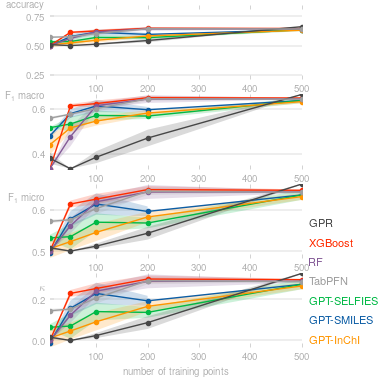

In [14]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[2, "SMILES", :].index,
            grouped_res.loc[2, "SMILES", :][metric]["mean"],
            marker="o",
            label="GPT-SMILES",
        )
        ax[i].fill_between(
            grouped_res.loc[2, "SMILES", :].index,
            grouped_res.loc[2, "SMILES", :][metric]["mean"]
            - grouped_res.loc[2, "SMILES", :][metric]["sem"],
            grouped_res.loc[2, "SMILES", :][metric]["mean"]
            + grouped_res.loc[2, "SMILES", :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2, "SELFIES", :].index,
            grouped_res.loc[2, "SELFIES", :][metric]["mean"],
            marker="o",
            label="GPT-SELFIES",
        )
        ax[i].fill_between(
            grouped_res.loc[2, "SELFIES", :].index,
            grouped_res.loc[2, "SELFIES", :][metric]["mean"]
            - grouped_res.loc[2, "SELFIES", :][metric]["sem"],
            grouped_res.loc[2, "SELFIES", :][metric]["mean"]
            + grouped_res.loc[2, "SELFIES", :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2, "InChI", :].index,
            grouped_res.loc[2, "InChI", :][metric]["mean"],
            marker="o",
            label="GPT-InChI",
        )
        ax[i].fill_between(
            grouped_res.loc[2, "InChI", :].index,
            grouped_res.loc[2, "InChI", :][metric]["mean"]
            - grouped_res.loc[2, "InChI", :][metric]["sem"],
            grouped_res.loc[2, "InChI", :][metric]["mean"]
            + grouped_res.loc[2, "InChI", :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[2, :].index,
            grouped_xgboost_res.loc[2, :][metric]["mean"],
            marker="o",
            label="XGBoost",
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2, :].index,
            grouped_xgboost_res.loc[2, :][metric]["mean"]
            - grouped_xgboost_res.loc[2, :][metric]["sem"],
            grouped_xgboost_res.loc[2, :][metric]["mean"]
            + grouped_xgboost_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rf_res.loc[2, :].index,
            grouped_rf_res.loc[2, :][metric]["mean"],
            marker="o",
            label="RF",
        )
        ax[i].fill_between(
            grouped_rf_res.loc[2, :].index,
            grouped_rf_res.loc[2, :][metric]["mean"] - grouped_rf_res.loc[2, :][metric]["sem"],
            grouped_rf_res.loc[2, :][metric]["mean"] + grouped_rf_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_gpr_res.loc[2, :].index,
            grouped_gpr_res.loc[2, :][metric]["mean"],
            marker="o",
            label="GPR",
        )
        ax[i].fill_between(
            grouped_gpr_res.loc[2, :].index,
            grouped_gpr_res.loc[2, :][metric]["mean"] - grouped_gpr_res.loc[2, :][metric]["sem"],
            grouped_gpr_res.loc[2, :][metric]["mean"] + grouped_gpr_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2, :].index,
            grouped_tabpfn_res.loc[2, :][metric]["mean"],
            marker="o",
            label="TabPFN",
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2, :].index,
            grouped_tabpfn_res.loc[2, :][metric]["mean"]
            - grouped_tabpfn_res.loc[2, :][metric]["sem"],
            grouped_tabpfn_res.loc[2, :][metric]["mean"]
            + grouped_tabpfn_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

    matplotx.line_labels(ax[-1], fontsize=8)
    ax[0].set_ylim(0.21, 0.85)
    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])
    ax[-1].set_xlabel("number of training points", labelpad=4)

    fig.savefig("opv-classification_results_2_class.pdf", bbox_inches="tight")

In [15]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

2.258870134348986

In [16]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.7675567287146652

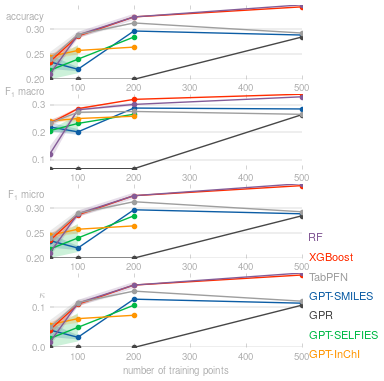

In [17]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[5, "SMILES", :].index,
            grouped_res.loc[5, "SMILES", :][metric]["mean"],
            marker="o",
            label="GPT-SMILES",
        )
        ax[i].fill_between(
            grouped_res.loc[5, "SMILES", :].index,
            grouped_res.loc[5, "SMILES", :][metric]["mean"]
            - grouped_res.loc[5, "SMILES", :][metric]["sem"],
            grouped_res.loc[5, "SMILES", :][metric]["mean"]
            + grouped_res.loc[5, "SMILES", :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[5, "SELFIES", :].index,
            grouped_res.loc[5, "SELFIES", :][metric]["mean"],
            marker="o",
            label="GPT-SELFIES",
        )
        ax[i].fill_between(
            grouped_res.loc[5, "SELFIES", :].index,
            grouped_res.loc[5, "SELFIES", :][metric]["mean"]
            - grouped_res.loc[5, "SELFIES", :][metric]["sem"],
            grouped_res.loc[5, "SELFIES", :][metric]["mean"]
            + grouped_res.loc[5, "SELFIES", :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[5, "InChI", :].index,
            grouped_res.loc[5, "InChI", :][metric]["mean"],
            marker="o",
            label="GPT-InChI",
        )
        ax[i].fill_between(
            grouped_res.loc[5, "InChI", :].index,
            grouped_res.loc[5, "InChI", :][metric]["mean"]
            - grouped_res.loc[5, "InChI", :][metric]["sem"],
            grouped_res.loc[5, "InChI", :][metric]["mean"]
            + grouped_res.loc[5, "InChI", :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[5, :].index,
            grouped_xgboost_res.loc[5, :][metric]["mean"],
            marker="o",
            label="XGBoost",
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5, :].index,
            grouped_xgboost_res.loc[5, :][metric]["mean"]
            - grouped_xgboost_res.loc[5, :][metric]["sem"],
            grouped_xgboost_res.loc[5, :][metric]["mean"]
            + grouped_xgboost_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rf_res.loc[5, :].index,
            grouped_rf_res.loc[5, :][metric]["mean"],
            marker="o",
            label="RF",
        )
        ax[i].fill_between(
            grouped_rf_res.loc[5, :].index,
            grouped_rf_res.loc[5, :][metric]["mean"] - grouped_rf_res.loc[5, :][metric]["sem"],
            grouped_rf_res.loc[5, :][metric]["mean"] + grouped_rf_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_gpr_res.loc[5, :].index,
            grouped_gpr_res.loc[5, :][metric]["mean"],
            marker="o",
            label="GPR",
        )
        ax[i].fill_between(
            grouped_gpr_res.loc[5, :].index,
            grouped_gpr_res.loc[5, :][metric]["mean"] - grouped_gpr_res.loc[5, :][metric]["sem"],
            grouped_gpr_res.loc[5, :][metric]["mean"] + grouped_gpr_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5, :].index,
            grouped_tabpfn_res.loc[5, :][metric]["mean"],
            marker="o",
            label="TabPFN",
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5, :].index,
            grouped_tabpfn_res.loc[5, :][metric]["mean"]
            - grouped_tabpfn_res.loc[5, :][metric]["sem"],
            grouped_tabpfn_res.loc[5, :][metric]["mean"]
            + grouped_tabpfn_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

    matplotx.line_labels(ax[-1], fontsize=8)
    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])
    ax[-1].set_xlabel("number of training points", labelpad=4)
    fig.savefig("opv-classification_results_5_class.pdf", bbox_inches="tight")